# chisq

#### Problem 1.

Using a chi-squared goodness-of-fit test with $\alpha = 0.05$, determine whether the 250 observations below come from a discrete uniform distribution on $\{7, 8, \dots, 23\}$. Based on the result of the chi-squared test, what can you conclude?

In [1]:
y = [11, 10, 15, 8, 22, 11, 18, 11, 14, 10,  9, 10, 10, 22, 11, 17,  8,
       11, 12,  8, 14, 23,  9, 11, 22, 19, 10, 19, 23, 20,  8, 12, 20,  8,
       15, 19,  9,  7,  7,  7, 10,  7, 16, 23,  8, 11, 14, 21, 20, 10, 23,
       10, 16, 18,  8, 13,  8,  9,  9, 11, 22, 21, 23, 11, 15, 10, 18, 19,
       14, 12, 22,  8, 14, 11, 12, 23, 12, 20,  7, 20, 10, 22, 14, 12, 13,
       10,  7, 12, 12,  8, 11, 14, 19, 22, 17, 14, 11, 21, 13,  9, 19, 21,
       13, 12, 15, 18, 18, 12, 11, 12, 14, 7, 22, 13, 12, 22,  8,  8,  8,
       14, 17, 22, 16, 22,  9, 15, 15, 23, 18, 10, 16, 19, 15, 18, 11, 12,
       15, 10,  9, 22,  7, 18, 18,  7, 22, 13, 20, 13, 17, 22, 12, 11, 19,
       23, 23, 13,  9, 20,  8,  8, 12, 20, 23,  9, 12, 13,  8, 14, 22, 16,
        7, 10, 15, 15, 22, 20, 11, 20, 17,  9, 14,  7, 11, 7, 11, 11,  9,
       23, 20,  8, 15, 11, 16, 22,  8,  7, 20, 16, 16, 15, 11, 13,  7, 12,
       12, 16, 19, 12,  9, 18, 20, 16,  7, 20, 10, 23, 16, 14, 16, 16, 19,
       16,  7, 23, 18,  9, 10, 14,  7, 23, 14, 23, 13, 10, 14, 7, 11,  8,
        7, 20, 16,  9, 11, 19,  8,  8, 18,  8, 20, 17]

First, some setup code.

In [2]:
# Import randint, chi2 random variables from scipy.stats
from scipy.stats import randint, chi2

# Import histogram function from Matplotlib
from matplotlib.pyplot import hist

# Run Matplotlib magic to show plots directly in the notebook
%matplotlib inline

# Make Matplotlib plots display as SVG files, which are cleaner
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

Now, we can proceed just as we did in class.

e = [14.705882352941176, 14.705882352941176, 14.705882352941176, 14.705882352941176, 14.705882352941176, 14.705882352941176, 14.705882352941176, 14.705882352941176, 14.705882352941176, 14.705882352941176, 14.705882352941176, 14.705882352941176, 14.705882352941176, 14.705882352941176, 14.705882352941176, 14.705882352941176, 14.705882352941176]
p-value = 0.0355081328807


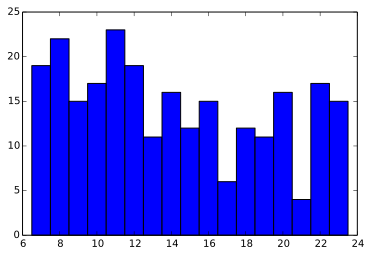

In [3]:
# Create bins for histogram
bins = range(7, 25)

# Plot histogram, get number of observations
o = hist(y, bins, align='left')[0]

# Define values of proposed random variable X
low = 7
high = 23
a = range(low, high + 1)

# Number of values that the proposed random variable takes
m = len(a)

# Number of observations
n = len(y)

# Compute expected number of observations equal to a[0], ..., a[m-1]
e = [n * randint.pmf(a[i], low, high + 1) for i in range(0,m)]

# Print expected number of observations to check rule of thumb: e[i] >= 5 for all i
print("e = {0}".format(e))

# Compute test statistic
testStatistic = sum([(e[i] - o[i])**2 / e[i] for i in range(0,m)])

# Compute p-value
pValue = 1 - chi2.cdf(testStatistic, m - 1)
print("p-value = {0}".format(pValue))

The null hypothesis is that the given observations are from a discrete uniform random variable on $\{7, \dots, 23\}$. For a significance level of 0.05, we reject the null hypothesis, statistically concluding that the observations are not from such a random variable.

#### Problem 2.

Using a chi-squared goodness-of-fit test with $\alpha = 0.05$, determine whether the 250 observations below come from a Bernoulli random variable with success probability 0.5 (i.e. do these observations come from a fair two-sided coin?). Based on the result of the chi-squared test, what can you conclude?

[SciPy documentation on the Bernoulli random variable object](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bernoulli.html)

In [4]:
y = [1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1]

First, some setup code.

In [5]:
# Import boltzmann, chi2 random variables from scipy.stats
from scipy.stats import bernoulli, chi2

# Import histogram function from Matplotlib
from matplotlib.pyplot import hist

# Run Matplotlib magic to show plots directly in the notebook
%matplotlib inline

# Make Matplotlib plots display as SVG files, which are cleaner
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

Now, we can proceed just as we did in class.

e = [125.0, 125.0]
p-value = 0.0577795711236


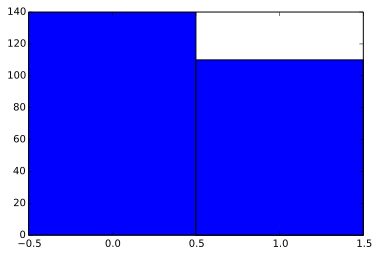

In [6]:
# Create bins for histogram
bins = [0, 1, 2]

# Plot histogram, get number of observations
o = hist(y, bins, align='left')[0]

# Define values of proposed random variable X
bernoulli_p = 0.50
a = [0, 1]

# Number of values that the proposed random variable takes
m = len(a)

# Number of observations
n = len(y)

# Compute expected number of observations equal to a[0], ..., a[m-1]
e = [n * bernoulli.pmf(a[i], bernoulli_p) for i in range(0,m)]

# Print expected number of observations to check rule of thumb: e[i] >= 5 for all i
print("e = {0}".format(e))

# Compute test statistic
testStatistic = sum([(e[i] - o[i])**2 / e[i] for i in range(0,m)])

# Compute p-value
pValue = 1 - chi2.cdf(testStatistic, m - 1)
print("p-value = {0}".format(pValue))

The null hypothesis is that the given observations are from a Bernoulli random variable with success probability 0.5. For a significance level of 0.05, we do not reject the null hypothesis, and statistically conclude that the observations are from such a random variable.